In [2]:
# data 
import pandas as pd 
import numpy as np

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline


# Import the trees from sklearn
from sklearn import tree

# Helper function to split our data
from sklearn.model_selection import train_test_split

from sklearn import metrics

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score 

# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Library for visualizing our tree
# If you get an error, run 'pip install graphviz' in your terminal
import graphviz 


# Helper function for hyper-parameter turning.
from sklearn.model_selection import GridSearchCV


In [3]:
#df = pd.read_csv(r'C:\Users\16464\OneDrive\Desktop\phishing.csv', index_col=None)
df = pd.read_csv('phishing_website_dataset.csv', index_col=None)
df.head()

# Result: 1 means legitimate 0 is suspicious -1 is phishing

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
df.shape


(11055, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
index                          11055 non-null int64
having_IPhaving_IP_Address     11055 non-null int64
URLURL_Length                  11055 non-null int64
Shortining_Service             11055 non-null int64
having_At_Symbol               11055 non-null int64
double_slash_redirecting       11055 non-null int64
Prefix_Suffix                  11055 non-null int64
having_Sub_Domain              11055 non-null int64
SSLfinal_State                 11055 non-null int64
Domain_registeration_length    11055 non-null int64
Favicon                        11055 non-null int64
port                           11055 non-null int64
HTTPS_token                    11055 non-null int64
Request_URL                    11055 non-null int64
URL_of_Anchor                  11055 non-null int64
Links_in_tags                  11055 non-null int64
SFH                            11055 non-null int64
Submitt

In [6]:
df.isnull().sum()

index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

In [7]:
df.duplicated().sum()

0

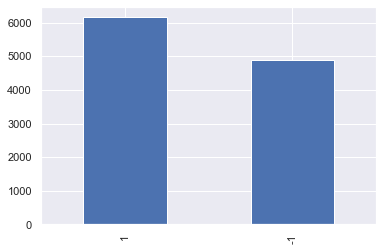

In [8]:
pd.value_counts(df["Result"]).plot.bar()

In [9]:
#sns.pairplot(df, hue="Result")

In [10]:
select_features = [#'having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service', 'having_At_Symbol', 
                   #'double_slash_redirecting', 
                   'Prefix_Suffix', 
                  'having_Sub_Domain', 
                  'SSLfinal_State', 'Domain_registeration_length',
                  #'Favicon', 'port', 'HTTPS_token', 
                   'Request_URL', 
                   'URL_of_Anchor',
                  'Links_in_tags', 
                   'SFH', 
                   #'Submitting_to_email', 'Abnormal_URL', 
                  #'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
                  #'age_of_domain', 'DNSRecord', 
                   'web_traffic', #'Page_Rank', 'Google_Index',
                  'Links_pointing_to_page', 
                    #'Statistical_report'
]

In [11]:
X = df[select_features]

y = df['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)


print('Training data: ', X_train.shape, '\nTesting data: ', y_test.shape)



Training data:  (8844, 10) 
Testing data:  (2211,)


In [12]:
# Select Random Forest as our model

model = RandomForestClassifier()

model.fit(X_train, y_train)

# evaluate our model
y_pred = model.predict(X_test)

In [13]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred)
print('F1 Score: %f' % f1)

y_pred_proba = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.953867
Precision Score: 0.955717
Recall Score: 0.961912
F1 Score: 0.958805
AUC Score: 0.989667


In [17]:


confusion_matrix = pd.crosstab(X_train, y_train, rownames=['Actual'], colnames=['Predicted'])

ValueError: Shape of passed values is (10, 2), indices imply (8844, 2)

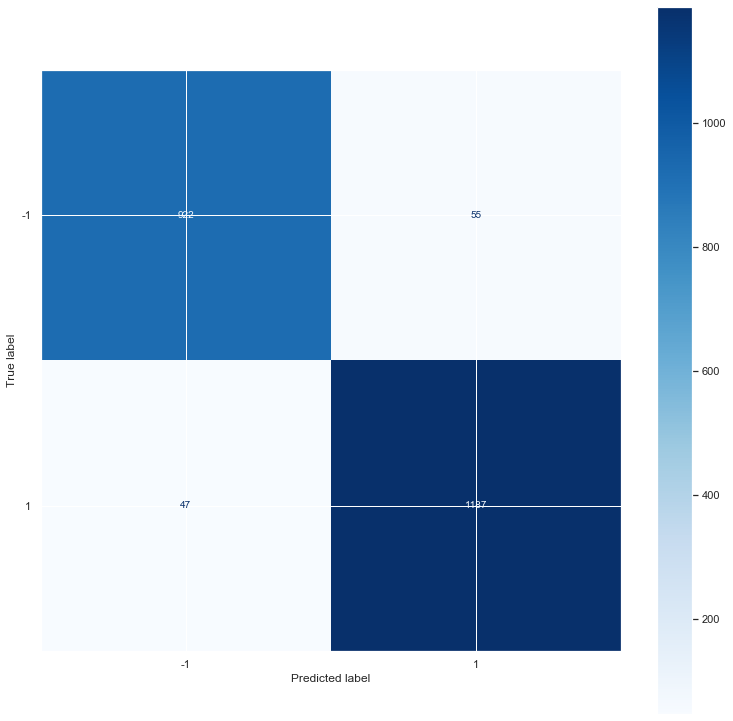

In [18]:
# Plot the confusion matrix of our results
fig, ax = plt.subplots(figsize=(13,13))
metrics.plot_confusion_matrix(estimator=model, 
                              X=X_test, 
                              y_true=y_test, 
                              cmap=plt.cm.Blues,
                              ax=ax)

In [ ]:
# Feature importances

my_dict = {'feature_importance': model.feature_importances_,
           'feature':select_features }
feature_importance = pd.DataFrame.from_dict( my_dict ).sort_values('feature_importance', ascending=False)
feature_importance